In [4]:
#Ejercicio 1

import numpy as np

def gauss_jordan_inverse(A):
    n = len(A)
    I = np.identity(n)
    M = np.concatenate((A, I), axis=1)
    for i in range(n):
        max_index = i + np.argmax(abs(M[i:, i]))
        M[[i, max_index]] = M[[max_index, i]]
        M[i] = M[i] / M[i, i]

        for j in range(n):
            if i != j:
                M[j] = M[j] - M[j, i] * M[i]
    return M[:, n:]

n = int(input("Ingrese el tamaño de la matriz: "))
A = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        A[i][j] = float(input(f"Ingrese el elemento [{i}][{j}]: "))

A_inv = gauss_jordan_inverse(A)

print("La matriz inversa de A es:")
print(A_inv)

Ingrese el tamaño de la matriz: 3
Ingrese el elemento [0][0]: 1
Ingrese el elemento [0][1]: 0
Ingrese el elemento [0][2]: -1
Ingrese el elemento [1][0]: 2
Ingrese el elemento [1][1]: 0
Ingrese el elemento [1][2]: 2
Ingrese el elemento [2][0]: 8
Ingrese el elemento [2][1]: 2
Ingrese el elemento [2][2]: -3
La matriz inversa de A es:
[[ 0.5    0.25   0.   ]
 [-2.75  -0.625  0.5  ]
 [-0.5    0.25  -0.   ]]


Para este caso Alpha y beta tienen la mejor aproximacion
[ 3.47128764 -0.07028704]


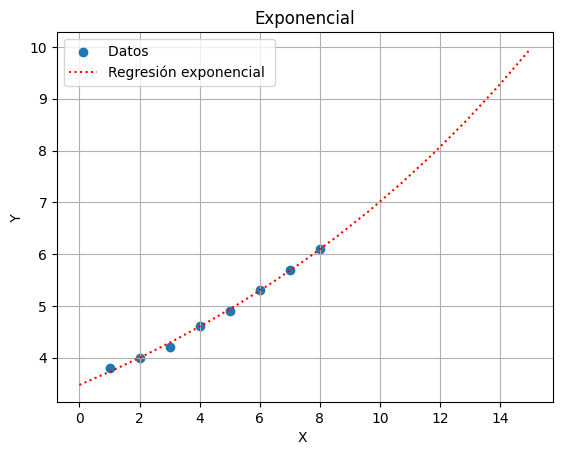

In [10]:
#Ejercicio 2

#Exponencial
import numpy as np
from scipy . optimize import curve_fit
import matplotlib . pyplot as plt

x = np . array ([1 ,2 ,3 ,4 ,5 ,6, 7, 8])
y = np . array ([3.8 ,4.0 ,4.2 ,4.6 ,4.9 ,5.3, 5.7, 6.1])

xs = np . linspace (0 ,15 ,15)
print("Para este caso Alpha y beta tienen la mejor aproximacion")

def f (x ,a , b ) :
  return a * np . exp ( - b * x )

param , _ = curve_fit (f ,x ,y , p0 =[0.1 , -0.0001])
print ( param )

fig = plt . figure ()
plt . scatter (x , y , label ='Datos ')
plt . plot ( xs , f ( xs ,* param ) , ':r', label ='Regresión exponencial ')
plt . xlabel ('X ')
plt . ylabel (' Y ')
plt . legend ()
plt . title ('Exponencial')
plt . grid ()
plt . show ()

[3.39639201 0.25428866]


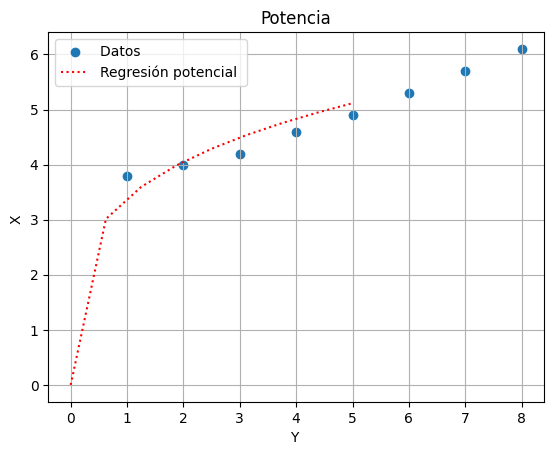

In [8]:
#Potencias

import numpy as np
from scipy . optimize import curve_fit
import matplotlib . pyplot as plt
x = np . array ([1 ,2 ,3 ,4 ,5 ,6, 7, 8])
y = np . array ([3.8 ,4.0 ,4.2 ,4.6 ,4.9 ,5.3, 5.7, 6.1])
xs = np . linspace (0 ,5 ,9)
def f (x ,a , b ) :
  return a * np . power (x , b )
param , _ = curve_fit (f ,x , y )
print ( param )

fig = plt . figure ()
plt . scatter (x , y , label ='Datos ')
plt . plot ( xs , f ( xs ,* param ) , ':r', label ='Regresión potencial ')
plt . xlabel ('Y ')
plt . ylabel ('X ')
plt . legend ()
plt . title ('Potencia')
plt . grid ()
plt . show ()

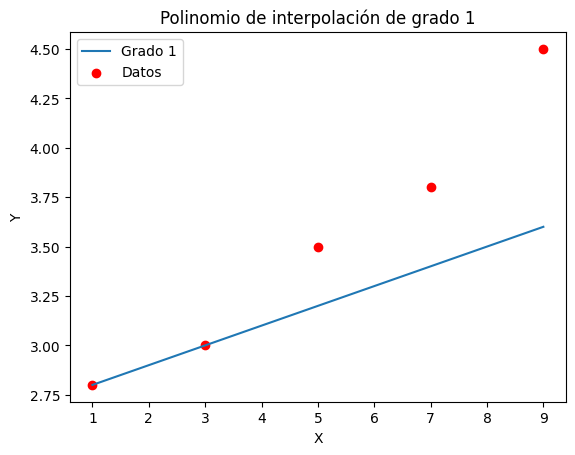

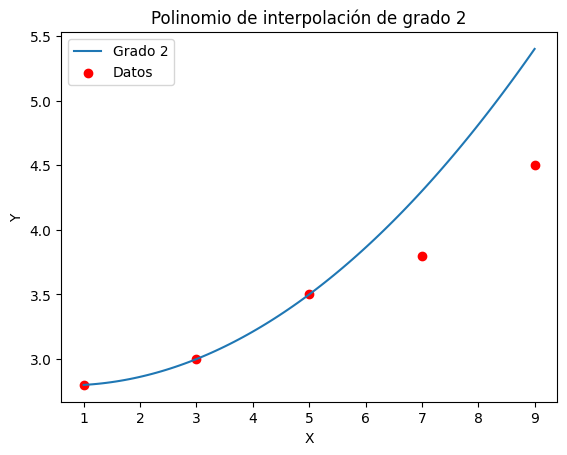

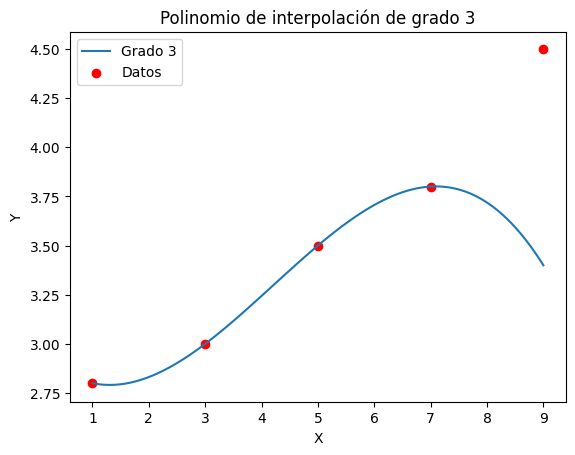

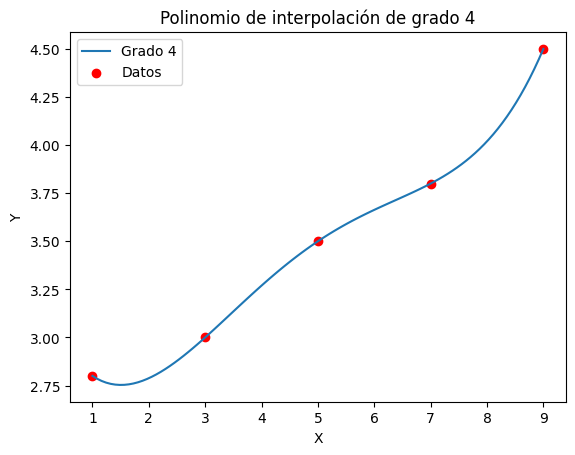

Grado	Estimación f(4.75)
1	3.1750000000000003
2	3.42109375
3	3.43818359375
4	3.4487579345703123


In [6]:
#Ejercicio 3

import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(X, Y, x):
    n = len(X)
    result = 0.0
    for i in range(n):
        term = Y[i]
        for j in range(n):
            if j != i:
                term *= (x - X[j]) / (X[i] - X[j])
        result += term
    return result

X = [1, 3, 5, 7, 9]
Y = [2.8, 3, 3.5, 3.8, 4.5]

x_eval = 4.75

degrees = [1, 2, 3, 4]
interpolated_values = []

# Calcular los polinomios de interpolación y estimar f(4.75) para cada grado
for degree in degrees:
    if degree > len(X):
        break
    X_subset = X[:degree+1]
    Y_subset = Y[:degree+1]
    interpolated_value = lagrange_interpolation(X_subset, Y_subset, x_eval)
    interpolated_values.append(interpolated_value)

    # Graficar el polinomio de interpolación
    x_plot = np.linspace(min(X), max(X), 100)
    y_plot = [lagrange_interpolation(X_subset, Y_subset, x) for x in x_plot]

    plt.figure()
    plt.plot(x_plot, y_plot, label=f"Grado {degree}")
    plt.scatter(X, Y, color='red', label='Datos')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title(f"Polinomio de interpolación de grado {degree}")

plt.show()

# Imprimir los resultados
print("Grado\tEstimación f(4.75)")
for i, degree in enumerate(degrees):
    print(f"{degree}\t{interpolated_values[i]}")